# Project 2: Credit Risk and Statistical Learning

**Names of all group members:**
- Firstname Lastname (email@example.com)
- Firstname Lastname (email@example.com)


---

All code below is only suggestive and you may as well use different approaches.

In [53]:
# Exercise 1.
import numpy as np
np.random.seed(0)  # for reproducibility

# simulate explanatory variables x
m = 20000
n = 10000
N = m + n 

x1 = np.random.uniform(18, 80, size = N)

x2 = np.random.uniform(1, 15, size = N)

x3 = np.random.binomial(n = 1, p = 0.1, size = N)

# a) calculate empirical means and standard deviations over training data

mean1 = x1[:m].mean()
mean2 = x2[:m].mean()
mean3 = x3[:m].mean()

std1 = x1[:m].std()
std2 = x2[:m].std()
std3 = x3[:m].std()

print(f'The mean age is {mean1:.2f} and the standard deviation is {std1:.2f}')
print(f'The mean salaray is {mean2:.2f} thousand CHF and the standard deviation is {std2:.2f}')
print(f'The mean employement standard is {mean3}, where 0 is emplyed and 1 self-employed, and the standard deviation is {std3:.2f}')

# b) Suggest other variables that would realistically be relevant in credit scoring.

'''
Other possible variables that would be relevant in credit scoring are:
- Debt-to-income ratio
- Length of credit history
- Payment history
- Amounts owed
- Credit mix
- New credit
- Savings
- Home ownership
- Employement stability
- Past defaults
'''

# (you do not have to implement those of course, just explain your answer in writing)


The mean age is 48.74 and the standard deviation is 18.01
The mean salaray is 7.99 thousand CHF and the standard deviation is 4.03
The mean employement standard is 0.1017, where 0 is emplyed and 1 self-employed, and the standard deviation is 0.30


'\nOther possible variables that would be relevant in credit scoring are:\n- Debt-to-income ratio\n- Length of credit history\n- Payment history\n- Amounts owed\n- Credit mix\n- New credit\n- Savings\n- Home ownership\n- Employement stability\n- Past defaults\n'

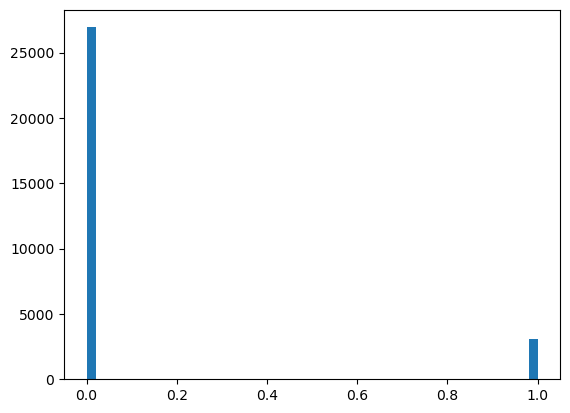

In [54]:
import matplotlib.pyplot as plt

plt.hist(x3, bins = 50)
plt.show()

In [55]:
# Exercise 2.
# Building the datasets:
x = np.column_stack((x1, x2, x3))
sigmoid = lambda x: 1. / (1. + np.exp(-x))

eps = np.random.uniform(0, 1, N)

# build the first dataset
def p1(x):
    return sigmoid(13.3-0.33*x[0] + 3.5*x[1] - 3 * x[2])


p1_values = np.array([p1(x[i]) for i in range(N)])
y1 = np.array([1 if eps[i] < p1_values[i] else 0 for i in range(N)])




# build the second dataset

def p2(x):
    x1 = 1 if x[0] < 25 or x[0] > 75 else 0
    return sigmoid(5-10*(x1) +1.1*x[1] - x[2])

p2_values = np.array([p2(x[i]) for i in range(N)])
y2 = np.array([1 if eps[i] < p2_values[i] else 0 for i in range(N)])


In [56]:
# Exercise 2. a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=0|X) and P(Y=1|X))
# "log_loss(Y, pred_X)" evaluates the negative conditional log likelihood (also called cross-entropy loss)

x_train = x[:n]
x_test = x[n:]
y1_train = y1[:n]
y1_test = y1[n:]
y2_train = y2[:n]
y2_test = y2[n:]

# Fit the models on both datasets



model1 = LogisticRegression().fit(x_train, y1_train)
model2 = LogisticRegression().fit(x_train, y2_train)


# Calculate cross-entropy loss on both datasets for train and test

loss_y1_train = log_loss(y1_train, model1.predict_proba(x_train))
loss_y1_test = log_loss(y1_test, model1.predict_proba(x_test))

loss_y2_train = log_loss(y2_train, model2.predict_proba(x_train))
loss_y2_test = log_loss(y2_test, model2.predict_proba(x_test))


import pandas as pd
print("Cross-entropy losses:")
losses = pd.DataFrame({
    "Dataset 1": [loss_y1_train, loss_y1_test],
    "Dataset 2": [loss_y2_train, loss_y2_test]
}, index=["Train", "Test"])

print(losses)

Cross-entropy losses:
       Dataset 1  Dataset 2
Train   0.031874    0.15083
Test    0.031511    0.15258


In [57]:
# Exercise 2.b)
# Calculate normalized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
# Exercise 2.b)
from sklearn.svm import SVC
# "model = SVC(kernel='rbf', gamma=GAMMA, C=C, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)

# Fit the models for both datasets (this can take up to 60 seconds with SVC)

C = 0.2
model1_svm = SVC(kernel="rbf", gamma=0.1, C=C, probability=True).fit(x_train_scaled, y1_train)
model2_svm = SVC(kernel="rbf", gamma=0.1, C=C, probability=True).fit(x_train_scaled, y2_train)



In [59]:

# Exercise 2.b)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))

# Calculate cross-entropy loss on both datasets for train and test
pred1_train = model1_svm.predict_proba(x_train_scaled)
pred1_test = model1_svm.predict_proba(x_test_scaled)
pred2_train = model2_svm.predict_proba(x_train_scaled)
pred2_test = model2_svm.predict_proba(x_test_scaled)
loss1_train_svm = log_loss(y1_train, pred1_train)
loss1_test_svm = log_loss(y1_test, pred1_test)
loss2_train_svm = log_loss(y2_train, pred2_train)
loss2_test_svm = log_loss(y2_test, pred2_test)
print("Cross-entropy losses with SVM:")
losses_svm = pd.DataFrame({
    "Dataset 1": [loss1_train_svm, loss1_test_svm],
    "Dataset 2": [loss2_train_svm, loss2_test_svm]
}, index=["Train", "Test"])
print(losses_svm)


Cross-entropy losses with SVM:
       Dataset 1  Dataset 2
Train   0.034212   0.072444
Test    0.033266   0.068045


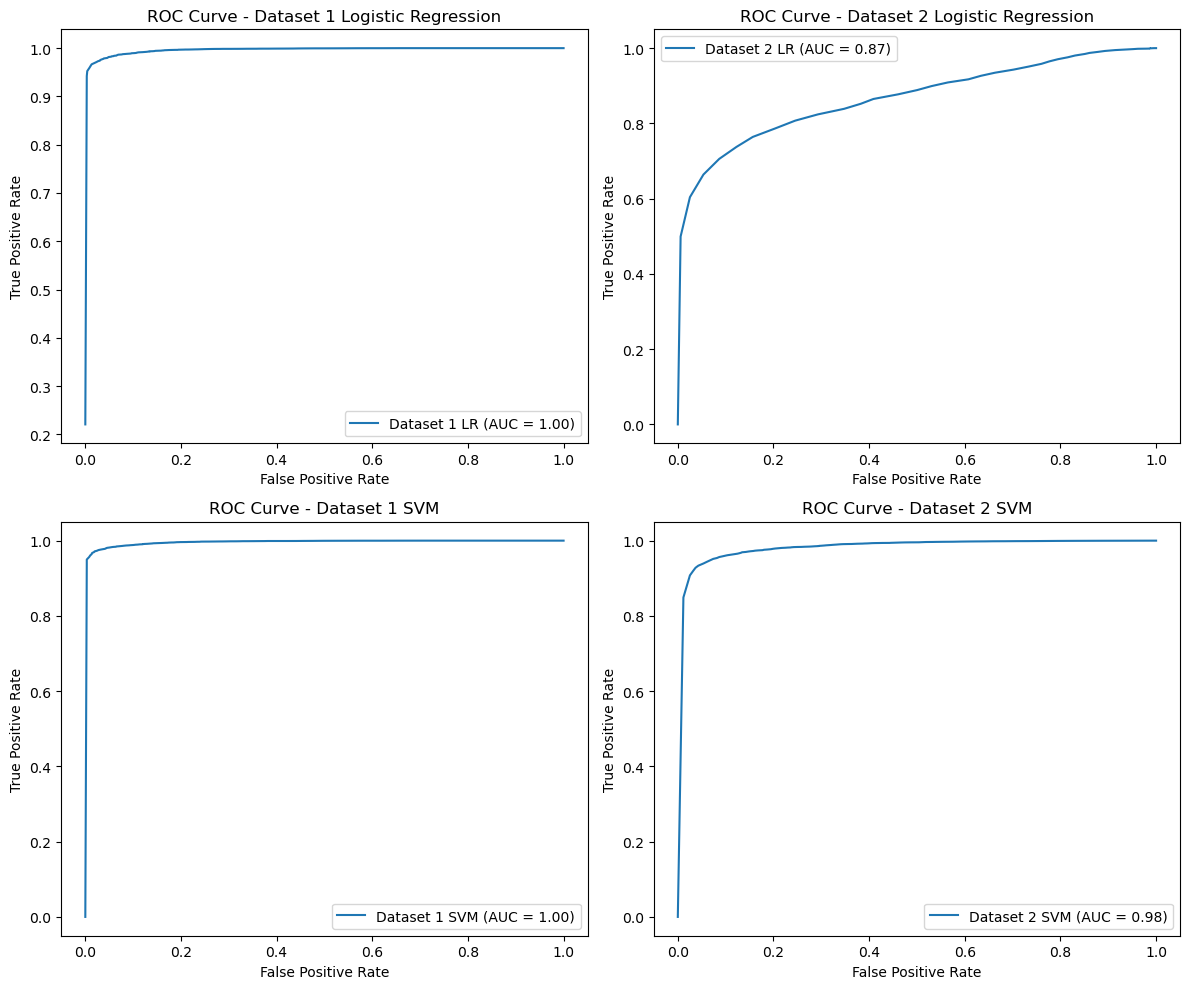

In [60]:

# Exercise 2.c)
import matplotlib.pyplot as plt
# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
ths = np.linspace(0, 1, 100)

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)

def compute_roc_auc(y_true, y_prob, thresholds):
    tpr_list = []
    fpr_list = []
    
    for c in thresholds:
        y_pred = (y_prob >= c).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # Sort by FPR (ascending)
    order = np.argsort(fpr_list)
    fpr = np.array(fpr_list)[order]
    tpr = np.array(tpr_list)[order]

    # Compute Riemann-sum AUC
    auc = 0.0
    for i in range(1, len(fpr)):
        auc += (tpr[i] + tpr[i-1]) / 2 * (fpr[i] - fpr[i-1])

    return fpr, tpr, auc



# Plotting the ROC curves, in 2*2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and predicted probabilities depending on the model)
y1_prob_lr = model1.predict_proba(x_test)[:, 1]

# Compute and plot the ROC and AUC cruves
fpr1_lr, tpr1_lr, auc1_lr = compute_roc_auc(y1_test, y1_prob_lr, ths)
axs[0, 0].plot(fpr1_lr, tpr1_lr, label=f'Dataset 1 LR (AUC = {auc1_lr:.2f})')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - Dataset 1 Logistic Regression')
axs[0, 0].legend()


# second data set & logistic regression:
y2_prob_lr = model2.predict_proba(x_test)[:, 1]
fpr2_lr, tpr2_lr, auc2_lr = compute_roc_auc(y2_test, y2_prob_lr, ths)
axs[0, 1].plot(fpr2_lr, tpr2_lr, label=f'Dataset 2 LR (AUC = {auc2_lr:.2f})')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - Dataset 2 Logistic Regression')
axs[0, 1].legend()



# first data set and SVM:
y1_prob_svm = model1_svm.predict_proba(x_test_scaled)[:, 1]
fpr1_svm, tpr1_svm, auc1_svm = compute_roc_auc(y1_test, y1_prob_svm, ths)
axs[1, 0].plot(fpr1_svm, tpr1_svm, label=f'Dataset 1 SVM (AUC = {auc1_svm:.2f})')
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - Dataset 1 SVM')
axs[1, 0].legend()



# second data set and SVM:
y2_prob_svm = model2_svm.predict_proba(x_test_scaled)[:, 1]
fpr2_svm, tpr2_svm, auc2_svm = compute_roc_auc(y2_test, y2_prob_svm, ths)
axs[1, 1].plot(fpr2_svm, tpr2_svm, label=f'Dataset 2 SVM (AUC = {auc2_svm:.2f})')
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - Dataset 2 SVM')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [62]:
# Show the AUC values in a table
auc_values = pd.DataFrame({
    "Dataset 1": [auc1_lr, auc1_svm],
    "Dataset 2": [auc2_lr, auc2_svm]
}, index=["Logistic Regression", "SVM"])
print("AUC values:")
print(auc_values)

AUC values:
                     Dataset 1  Dataset 2
Logistic Regression   0.995664   0.867331
SVM                   0.995087   0.980440


In [61]:
# Exercise 3.

# Set model parameters and define matrix D


# Scenario 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D


# Plot the histogram of profits and losses


# Calculate expected profit and losses, compute 95%-VaR and 95%-ES


# Scenario 2:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the logistic regression model


# Plot the histogram of profits and losses


# Calculate expected profit and losses, compute 95%-VaR and 95%-ES


# Scenario 3:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the SVM model


# Plot the histogram of profits and losses


# Calculate expected profit and losses, compute 95%-VaR and 95%-ES